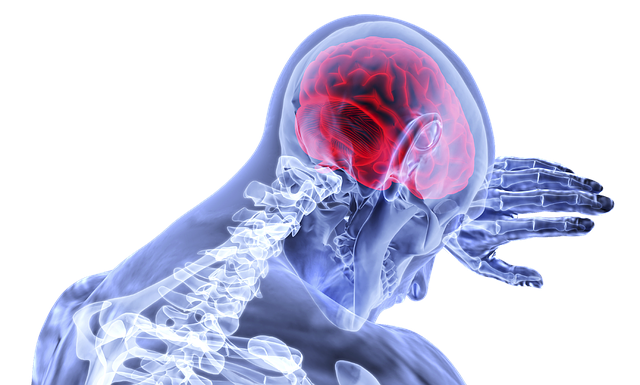

**Stroke is a leading cause of death in the US and a major cause of severe disability in adults. The sudden death of living brain cells due to loss of blood flow or lack of  oxygen flow to brain is almost fatal.**

The stroke prediction dataset used here contains data like age, average glucose level in body, whether or not they had a heart disease or hypertension, etc of patients.The data is split into training and test data and the training data is used to create models that predict whether or not an entry from the test data will suffer a stroke.

**Let us undetstand the elements of the dataset, make some general observations and develop a model to predict stroke on new data.**

### Do upvote if you like the analysis. :)

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np

#Importing data visulaisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

#### Reading data and displaying first the 5 rows of the dataframe

In [ ]:
df=pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head()

#### Missing values

In [ ]:
msno.matrix(df)  

**BMI column has missing values.**

#### Statistical insights

In [ ]:
df.describe().T   #Statistical details of the dataframe

In [ ]:
print('Shape of dataframe:',df.shape) #Shape of the dataframe
print('\n')
print('Columns of the dataset:',df.columns) #Names of columns of the dataset

In [ ]:
sns.countplot(x='stroke',data=df)

## Exploratory Data Analysis

### Heatmap

In [ ]:
#Plotting a heatmap to find correlations between the variables.

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

From the heatmap, it can be seen that the **correlation of stroke with age of the person is the highest compared to the other factors** i.e., 0.25. Average glucose level, hypertension and heat disease have equal values.

### Gender and chances of stroke

In [ ]:
print(df.groupby('gender').stroke.value_counts().to_frame())

sns.set_style('whitegrid')
sns.countplot(x='stroke',data=df,hue='gender',palette='spring')
plt.title('Gender wise stroke count',fontweight='bold')

Total no. of females in the dataset = 2853+141 = 2994

Total no. of females who suffered a stroke = 141

% of females who suffered a stroke = (141/2994)*100 = 4.70%

Total number of males in the dataset = 2007+108 = 2115

Total number of males who suffered a stroke = 108

% of males who suffered a stroke= (108/2115)*100 = 5.10%

Thus, according to the dataset, **the risk of stroke among males is comparitively higher.** 

### Relation between gender and hypertension

In [ ]:
print(df.groupby('gender').hypertension.value_counts())

sns.countplot(x='hypertension',data=df,hue='gender',palette='summer')
plt.title('Gender wise hypertension count',fontweight='bold')

Total no. of females in the dataset = 2994

Total no. of females who suffer from hypertension = 276

% of females who suffered a stroke = (276/2994)*100 = 9.21%

Total number of males in the dataset = 2115

Total number of males who suffered a stroke = 222

% of males who suffered a stroke= (222/2115)*100 = 10.49%

Thus, among the people surveyed **hypertension is more common among males.** 

### Relation between gender and heart disease

In [ ]:
print(df.groupby('gender').heart_disease.value_counts())

sns.countplot(x='heart_disease',data=df,hue='gender',palette='autumn')
plt.title('Gender wise heart disease count',fontweight='bold')

The plot shows clearly that chances of males suffering from a heart disease (value=1) is higher than females.  
    
Total no. of females in the dataset = 2994

Total no. of females who suffer from a heart disease = 113

% of females who suffered a stroke = (113/2994)*100 = 3.77%

Total number of males in the dataset = 2115

Total number of males who suffered a stroke = 163

% of males who suffered a stroke= (163/2115)*100 = 7.70%

Thus on calculating also we see, among the people surveyed **more males suffer from some kind of heart disease compared to females (NEARLY DOUBLE)**. 

### Relation between residence type and stroke

In [ ]:
print(df.groupby('stroke').Residence_type.value_counts())

sns.countplot(x='Residence_type',data=df,hue='gender')

Total number of people living in urban areas = 2465+135 = 2600

No. of people from urban areas who suffered a stroke = 135

% of people from urban areas who suffered a stroke = (135/2600)*100 = 5.16%

Total number of people living in rural areas = 2400+114 = 2514

No. of people from rural areas who suffered a stroke = 114

% of people from rural areas who suffered a stroke = (114/2514)*100 = 4.53%

From the values obtained above, it can be seen that the **chances of stroke among people living in urban areas is VERY SLIGHTLY higher than that among people from rural areas.**

This looks pretty logical because people belonging to cities and towns generally have a sedentary lifestyle and suffer from more stress. These could be the major factors that could lead to a stroke.

### Relation between stroke, gender and their average glucose level

In [ ]:
#A function is defined which classifies the average glucose level of the people into various categories like high, low and normal.
#This function is applied on the avg_glucose_level column and another column is added to the dataframe df based on the results obtained on applying this function.

def glucose_level(amount):
    if amount<60:
        return 'Dangerously low'
    elif 60<=amount<90:
        return 'Low'
    elif 90<=amount<110:
        return 'Normal'
    elif 110<=amount<140:
        return 'Slightly high'
    elif 140<=amount<240:
        return 'High'
    elif 240<=amount<300:
        return 'Extremely high'
    else:
        return 'Dangerously high, requires medical attention'
    
#This classification is done based on the data available on the internet.
    
df['Glucose_level_chart']=df['avg_glucose_level'].apply(glucose_level)
df.head()

In [ ]:
print(df.groupby('stroke').Glucose_level_chart.value_counts())

sns.set_style('ticks')
fig,axes=plt.subplots(1,2,figsize=(18,4))
sns.countplot(ax=axes[0],x='Glucose_level_chart',data=df,hue='stroke',color='green')
sns.countplot(ax=axes[1],x='Glucose_level_chart',data=df,hue='gender',color='cyan')

People with high and low average glucose level are at higher risk of suffering a stroke compared to people with normal glucose level.

Total number of people with low average glucose level = 2102+80 = 2181

Number of people having low average glucose level who suffered a stroke = 80

**% of people having low average glucose level who suffered a stroke = (80/2181)*100 = 3.66%**

Total number of people with high average glucose level = 684+82 = 766

Number of people having high average glucose level who suffered a stroke = 82

**% of people having high average glucose level who suffered a stroke = (82/766)*100 = 10.7%**


### Relation between age and chances of stroke

In [ ]:
list_stroke=[]

for i in df['age'].index:
    if (df['stroke'][i]==1):
        list_stroke.append(df['age'][i])
print('Total number of people who suffered a stroke:', len(list_stroke))

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.title('Age distribution of people who suffered a stroke',fontweight='bold',fontsize=14)
plt.xlabel('Age')
sns.distplot(list_stroke,bins=50)

In [ ]:
Male_patients=[]
Female_patients=[]
for i in df['age'].index:
    if (df['stroke'][i]==1):
        if (df['gender'][i]=='Male'):
            Male_patients.append(df['age'][i])
        else:
            Female_patients.append(df['age'][i])
            
fig,axes=plt.subplots(1,2,figsize=(18,4))
sns.distplot(Male_patients,ax=axes[0],color='orange',bins=25,kde=False)
sns.distplot(Female_patients,ax=axes[1],color='yellow',bins=25,kde=False)
axes[0].set_title('Age wise chances of stroke among males',fontweight='bold')
axes[0].set_xlabel('Age of male patient')
axes[1].set_title('Age wise chances of stroke among females',fontweight='bold')
axes[1].set_xlabel('Age of female patient')

It can be seen that the age of **most of the people who have suffered a stroke is between 70-80 years** (more count is in between the age 75-80 years).

### Work type and stroke analysis

In [ ]:
print(df.groupby('work_type').stroke.value_counts())

plt.figure(figsize=(10,4))
plt.title('Work type and stroke',fontweight='bold')
plt.xlabel('Work')
sns.countplot(x='work_type',data=df,hue='stroke',palette='dark')

It can be seen that the three major work types are:

1.Private jobs-

% of employees in **private sector** who have suffered a stroke = (149/2925)*100 = 5.09%

2.Government jobs-

% of **government employees** who have suffered a stroke = (33/657)*100 = 5.02%

3.Self-employed-

% of **self-employed people** who have suffered a stroke = (65/819)*100 = 7.93%

It can be observed that the employment type does not have a very significant role to play while analysing the occurence of stroke. While the % remains almost the **same for private and government employees, self-employed people are more prone** a stroke according to the information provided in the dataset.

### Relation between smoking status and stroke

In [ ]:
print(df.groupby('smoking_status').stroke.value_counts())

plt.title('Smoking status analysis',fontweight='bold')
plt.xlabel('Smoking status')
sns.countplot(x='smoking_status',data=df,hue='gender',color='black')

The smoking status of a huge lot of people is unknown. However, on analysing the available data we see:

% of people who suffered a stroke and **smoke or have formerly smoked = (112/1674)*100 = 6.69%**

% of people who suffered a stroke and **have never smoked = (90/1802)*100 = 4.99%**

**Smoking** can also be considered as a **contributing factor in the occurrence of stroke.**

### Filling in missing values

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cmap='viridis')

#### Filling in 'bmi' column with appropriate values

In [ ]:
#Only the bmi column has missing data.
#Filling in the missing values for bmi.
   
 #1. Creating a function to classify bmi values into different groups.
 #2. Based on the classification we will create box plots.
 #3. Based on the averages obtained through box plots we will fill the average value in different classifications made in #1. 

def bmi_values(bmi_values):
    if bmi_values<20:
        return 'undernourished'
    elif 20<=bmi_values<30:
        return 'normal_weight_1'
    elif 30<=bmi_values<40:
        return 'overweight'
    elif 40<=bmi_values<50:
        return 'Obese I'
    elif 50<=bmi_values<70:
        return 'Obese II'
    elif 70<=bmi_values<100:
        return 'Obese III'
    else:
        pass
df['bmi_classification']=df['bmi'].apply(bmi_values)
df.head()

In [ ]:
print(df.groupby('bmi_classification').stroke.value_counts())

plt.figure(figsize=(12,8))  #Box plots
sns.set_style('whitegrid')
sns.boxplot(x='bmi_classification',y='bmi',data=df)
plt.title('BMI classes',fontweight='bold',fontsize=12)

In [ ]:
def bmi_fill(bmi_value):       #Filling in values based on the results obatined from the box plot.
    if pd.isnull(bmi_value):   
        if bmi_value<=20:
            return 17
        elif 20<bmi_value<=30:
            return 26
        elif 30<bmi_value<=40:
            return 33
        elif 40<bmi_value<=50:
            return 43
        elif 50<bmi_value<=70:
            return 55
        elif 70<bmi_value<=100:
            return 63
        else:
            return 105
    else:
        return bmi_value 
    
df['bmi']=df['bmi'].apply(bmi_fill)
df.head()  

In [ ]:
df['bmi'].isnull().sum()

No null values are left in the dataframe now.

### Pairplots 
Pairplots show the correlation of each feature with every other feature.

In [ ]:
sns.pairplot(df.corr())

#### Getting dummies for categorical column

In [ ]:
Gender =pd.get_dummies(df['gender'],drop_first=True)   #Getting dummies for categorical column -'gender' (that has strings)
df=pd.concat([df,Gender],axis=1)

In [ ]:
df.head()

In [ ]:
#Now there are no missing values in the bmi column.

#Dropping the columns that are not required for training the model.
df.drop(['id','bmi_classification','work_type','ever_married','Residence_type','smoking_status','Glucose_level_chart','gender'],axis=1,inplace=True)
df.head()

## Creating model and making predictions

In [ ]:
X = df.drop(columns=["stroke"])
y = df["stroke"]

In [ ]:
print('Shape of X:', X.shape)
X.head()

In [ ]:
print('Shape of y:', y.shape)
y.head()

## Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
from sklearn.tree import DecisionTreeClassifier

In [ ]:
print('Shape of X after statifcation: ', X.shape)
print('Shape of y after stratification: ', y.shape)

In [ ]:
lm=DecisionTreeClassifier()

In [ ]:
lm.fit(X_train,y_train)

In [ ]:
lm_predictions=lm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,lm_predictions))

In [ ]:
print(confusion_matrix(y_test,lm_predictions))

In [ ]:
lm.score(X_test,y_test)

#### Errors % in the model predictions

In [ ]:
#Error in case of Decision tree model

from sklearn.metrics import mean_squared_error
mean_sq_error=mean_squared_error(y_test,lm_predictions)
print('Mean squared error: ',mean_sq_error)
print('Root mean squared error ',mean_sq_error**0.5)

## Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
prediction_rfc= rfc.predict(X_test)

In [ ]:
print('Confusion Matrix; ')
print(confusion_matrix(y_test,prediction_rfc))
print('\n')
print('Classification Report: ')
print(classification_report(y_test,prediction_rfc))

In [ ]:
rfc.score(X_test,y_test)

#### Errors % in the model predictions

In [ ]:
#Error in case of Random forest model

mean_sq_error_rfc=mean_squared_error(y_test,prediction_rfc)
print('Mean squared error: ',mean_sq_error_rfc)
print('Root mean squared error ',mean_sq_error_rfc**0.5)

Mean squared error in case of Random Forest Classifier is 0.053 whereas in case of Decision Tree model the mean squared error is 0.097.

**Random forest model yields better predictions in this case.**


## Thanks for reading. :)